
<img src="images/logo_UM.png" alt="logo Universidade do Minho" style="display: block; margin: auto; width: 25%" />
<p style="text-align: center; font-size: 12px">Licenciatura em Ciências da Computação</p>

<br/>

### <center>Unidade Curricular Projeto

<br/>

# <center>**Armazenamento de imagens e bases de dados vetoriais**
####   <center>Maio 2025</center>

<br/>

<br/>

**a53971** &ensp; Nuno Filipe Norberto Gonçalves de Oliveira

**a83783** &ensp; João Pinheiro Vitor

**a81820** &ensp; David João Oliveira Gonçalves

<br/>

---

<br/>
<br/>

## <center>Introdução

No âmbito da UC Projeto, foi-nos sugerida a criação de um sistema que recolha e armazene ficheiros de imagem num sistema de bases de dados vetorial, para posterior identificação de padrões de imagens.

No sentido de ir ao encontro do sugerido, decidimos criar um sistema de reconhecimento facial.

Este sistema permite ao utilizador fornecer uma imagem como *input*. O programa irá então identificar as faces presentes na imagem (caso existam) e como resultado apresenta as imagens, presentes na nossa base de dados, com as faces mais semelhantes ao *input*.

Ao longo deste documento iremos detalhar quais as tecnologias utilizadas, as etapas do desenvolvimento deste sistema e particularidades da sua implementação.

Por fim, faremos uma pequena demonstração do uso da aplicação.
<br><br>


### &ensp; Contextualização e motivação

O reconhecimento facial é um campo de investigação e desenvolvimento activo há várias décadas, com inúmeras aplicações já implementadas no nosso dia-a-dia. Desde o desbloqueio de smartphones até aos sistemas de vigilância, a tecnologia tem demonstrado o seu potencial e importância crescente.

No entanto, existem vários desafios, sejam eles na identificação de características das faces ou no armazenamento das imagens numa base de dados. Lidar com variações na aparência facial devido a diferentes condições de iluminação, ângulos de visão, expressões faciais e oclusões (como óculos ou máscaras) continua a ser um problema complexo. As dificuldades que as bases de dados tradicionais têm no armazenamento de imagens é também um entrave: as imagens podem ser ficheiros grandes, e armazenar um grande volume delas diretamente na base de dados pode levar a um crescimento exponencial do tamanho da mesma, o que pode levar a um baixo desempenho aplicacional.

É neste contexto que a utilização de bases de dados vetoriais surge como uma alternativa promissora. Ao representar imagens como vetores num espaço de alta dimensão, onde a distância entre vetores reflete a similaridade entre as imagens, torna-se possível realizar pesquisas mais eficientes e encontrar correspondências mesmo quando as imagens apresentam variações significativas.

Este projeto vai de encontro às tendências atuais na área de reconhecimento de padrões e análise de imagem, explorando a cooperação entre técnicas de visão computacional e sistemas de armazenamento. 

<br><br><br>

## <center>Tecnologias e bibiliotecas utilizadas

### &ensp; Base de dados

A seleção de uma base de dados vetorial que se adequasse às necessidades do nosso sistema foi uma etapa relevante no desenvolvimento, dada a sua importância para o armazenamento, indexação e pesquisa dos *embeddings* gerados.
<br>Após uma análise comparativa de três soluções – Pinecone, Qdrant e KDB.AI – a nossa escolha recaiu sobre [Qdrant](https://qdrant.tech/) como a ferramenta mais adequada para as necessidades específicas deste projeto.

Esta decisão foi fundamentada com base nos seguintes critérios:
- Qualidade da documentação

- Facilidade de configuração

- Possibilidade de uso localmente

- Persistência de dados (local)

Podemos ver na tabela seguinte os resultados da nossa avaliação:


| Critério | Pinecone | Qdrant | KBD.AI |
| --- | --- | ---| --- |
| **Qualidade da documentação** | Extensa, com exemplos, mas, por vezes, algo confusa | Extensa, com exemplos e bem estruturada | Algo confusa e com menos exemplos que Pinecone e Qdrant |
| **Facilidade de configuração** | Simples | Simples | Requer a instalação de mais bibliotecas |
| **Uso localmente** | Disponível mas limitado | Disponível | Disponível |
| **Persistência de dados (local)** | Não | Sim | Sim |

<br>

### &ensp; Linguagens e bibliotecas

Este projeto foi desenvolvido em Python (versão 3.11).

Entre as bibliotecas utilizadas, destacamos as seguintes:
- [Transformers](https://huggingface.co/docs/transformers/index): biblioteca de NPL's pré-treinadas, visão computacional, áudio e modelos multimodais para inferência e treino.

- [MTCNN (Multi-Task Cascaded Convolutional Neural Network)](https://mtcnn.readthedocs.io/en/latest/): biblioteca robusta para detecção facial, desenvolvida para detetar faces e os seus pontos de referência numa imagem, recorrendo a três CNNs. 

- [Pillow](https://pillow.readthedocs.io/en/stable/): biblioteca para processamento de imagens.

- [Qdrant-client](https://python-client.qdrant.tech/): biblioteca que permite utilizar a API de Qdrant.

- [Torch](https://pytorch.org/): biblioteca de *Machine Learning*



Foram também utilizadas outras bibliotecas para manipulação de dados numéricos e vetores.
<br><br>


### &ensp; Modelos *Vision Transformer*

A fase de transformação de imagens em *embeddings* é um passo fundamental para o bom desempenho do nosso sistema de reconhecimento facial, uma vez que a qualidade destas representações vetoriais impacta diretamente a capacidade do sistema em identificar padrões e realizar comparações eficazes. Dada a vasta gama de modelos de *Machine Learning* capazes de executar esta tarefa, a seleção de modelos adequados exigiu a definição de alguns critérios, que nos permitissem escolher aqueles que melhor se ajustassem aos objetivos do projeto.

Os critérios de selecção definidos foram os seguintes: 
- **tarefa para o qual o modelo foi treinado**: focamo-nos em modelos que foram especificamente treinados para a tarefa de *Image Feature Extraction*. Esta especialização garante que o modelo aprendeu a extrair características visuais relevantes das imagens, essenciais para a posterior comparação de similaridade facial.

- **tamanho e diversidade do dataset no qual foi treinado**: a capacidade de um modelo reconhecer e categorizar diferentes imagens depende da quantidade e diversidade dos dados nos quais foi treinado. [$^*$](https://developers.google.com/machine-learning/intro-to-ml/supervised)

- **resolução das imagens do dataset**: a resolução das imagens que compõem o nosso conjunto de dados situa-se predominantemente entre os 1024x768 e os 2048x1536 pixels. Tendo estes valores em consideração, a nossa abordagem consistiu em extrapolar um tamanho razoável para as faces presentes nas imagens, de maneira que houvesse informação suficiente para capturar os detalhes faciais de cada pessoa, e procurar modelos que tivessem sido treinados com resoluções de imagem que se aproximassem dessa escala facial estimada.

- **dimensão do *embedding* gerado**: a dimensão do vetor gerado deve ter em conta um equilíbrio entre a riqueza da informação codificada e a eficiência computacional. Um *embedding* de alta dimensão contém mais informação e detalhes acerca de uma imagem, mas também exige mais recursos de armazenamento e processamento.

Com base nestes critérios, realizamos uma pequena análise das diversas opções disponíveis na plataforma [HuggingFace](https://huggingface.co/models).

A nossa escolha recaiu sobre os modelos *google/vit-base-patch16-224-in21k* e *facebook/dino-vits16* pelos seguintes motivos:

- os dois modelos foram treinados para a tarefa pretendida

- ambos geram *embeddings* com a mesma dimensão - 768

- foram treinados com imagens de resolução 224x224 pixels, resolução que nos pareceu adequada para o sistema a implementar 

- o modelo da google foi treinado recorrendo a um dataset com 14 milhões de imagens e 21843 classes/categorias de objetos

- o modelo do facebook foi treinado recorrendo a um dataset com aproximadamente 1,3 milhões de imagens e 1000 classes/categorias de objetos

<br>


## <center>Implementação

### &ensp; Configuração Inicial


Para a execução bem-sucedida deste notebook, devemos certeficar-nos que os seguintes pré-requisitos são atendidos:

- **Disponibilidade das imagens**: as imagens a serem armazenadas na base de dados devem estar localizadas na diretoria **assets**.

- **Instalação de Docker**: a plataforma **[Docker](https://docs.docker.com/get-started/get-docker/)** deve estar devidamente instalada

- Todos os ***packages*** necessários para a execução do código devem ser previamente instalados


```bash
# Opcional
# Criar ambiente virtual recorrendo ao conda/miniconda
conda create -n my_env python=3.11 pip
conda activate my_env

# Ou recorrendo a virtualenv
python=3.11 -m venv venv
source venv/bin/activate

# Instalar packages
pip install -r requirements.txt --extra-index-url https://download.pytorch.org/whl/cpu

# Transferência de outros módulos necessários
wget https://raw.githubusercontent.com/nfngo/LCC_Projecto_2024-2025/refs/heads/main/qdrant/utils.py

wget https://raw.githubusercontent.com/nfngo/LCC_Projecto_2024-2025/refs/heads/main/models/models.py

# Transferência da imagem docker de Qdrant
docker pull qdrant/qdrant

# Inicialização de container de Qdrant
docker run -p 6333:6333 \
            -v $(pwd)/qdrant_storage:/qdrant/storage \
            qdrant/qdrant
```

<br>
Após garantirmos que temos todos os recursos instalados e a funcionar corretamente, importamos as bibliotecas necessárias e estabelecemos uma ligação com a base de dados.

In [1]:
from qdrant_client import QdrantClient
from qdrant_client.http import models
from PIL import Image
import os

import qdrant.utils as qd
import models.models as mdl

/home/oliveira/miniforge3/envs/test_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-05 21:30:00.932574: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Local dev
client = QdrantClient(host="localhost", port=6333)

De seguida, criamos uma **colecção**.

Uma colecção é um conjunto de pontos na qual podemos efetuar pesquisas. Estes pontos são constituídos por um vetor e um *payload*, que não é mais que uma *feature* de Qdrant que permite associar informação adicional aos vetores. Os vetores de cada ponto que pertença à mesma colecção devem ter a mesma dimensão e são comparados recorrendo a uma métrica de similaridade. 

Neste projeto, tendo em conta os modelos escolhidos para gerar *embeddings* (representações vetoriais das imagens), cada vetor será composto por 768 valores do tipo *float*.

Como métrica de similaridade, optamos pela similaridade por cosseno.

<br>

$$
similarity(A,B) = cos(\theta) = \frac{A \cdot B}{\|A\|\|B\|}
$$

<br>

Esta métrica permite calcular o cosseno do ângulo entre dois vetores, possibilitando saber de forma eficaz se os dois apontam na mesma direcção. Como resultado, obtém-se um valor no intervalo [-1, 1]. Valores próximos de 1 significam que os vetores têm direcções semelhantes e valores próximos de -1 indicam-nos que os vetores apontam em direcções opostas.

No contexto de *embeddings* de imagem que representam faces, a direcção representa as propriedades da face. Idealmente, duas imagens da face da mesma pessoa, se considerarmos diferentes condições de luz ou poses diferentes, devem apontar na mesma direcção. 

É importante, portanto, que seja possível "descartar" certas propriedades das imagens, tais como a luminosidade ou o contraste, que influenciam a magnitude dos vetores.
<br>Uma vez que no cáculo da similaridade por cosseno se faz uma normalização dos vetores pela sua magnitude, esta métrica torna-se ideal para o pretendido.

In [3]:
collection = "image_collection"

# facebook/dino-vitb16 size: 768
# Vit Base Patch16 224 In21k size: 768
qd.create_collection(client, collection, 768, models.Distance.COSINE)

<br>

### &ensp; Processamento de Imagens

Ainda antes de passarmos à conversão das imagens para *embeddings*, é necessário armazenar informações de cada uma das imagens que pretendemos analisar, que devem estar guardadas na pasta "assets".

Como estrutura para armazenar esta informação, escolhemos uma lista de dicionários, que nos permite guardar, para cada imagem, os seguintes dados: nome da pessoa presente na imagem, nome do ficheiro e objeto de imagem.

De forma a agilizar o processo, o nome de cada ficheiro contém o nome da pessoa.

```python
data = [img_1, img_2, img_3...]

img_1 = {
        "name": ...,
        "file_name": ...,
        "img_obj": ...
    }
```

In [4]:
current_directory = os.getcwd()
extensions = (".jpg", ".jpeg", ".webp")

def get_images_data(path):
    data = []
    for file in os.listdir(f"{path}"):
        if file.endswith(extensions):
            file_name = file.split(".")[0].lower().replace("_"," ")
            name = "".join(c for c in file_name if c.isalpha() or c == ' ')[:-1] 
            img_data = {
                "name": name,
                "file_name": file,
                "img_obj": Image.open(os.path.join(f"{path}",file))
            }
            data.append(img_data)
    
    return data

data = get_images_data(f"{current_directory}/assets")

In [5]:
len(data), data

(79,
 [{'name': 'cristiano ronaldo',
   'file_name': 'Cristiano_Ronaldo_2.webp',
   'img_obj': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=2048x1152>},
  {'name': 'cristiano ronaldo',
   'file_name': 'Cristiano_Ronaldo_3.jpeg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=800x999>},
  {'name': 'luis montenegro',
   'file_name': 'Luis_Montenegro_3.jpg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x576>},
  {'name': 'gabriela barros',
   'file_name': 'Gabriela_Barros_1.jpg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768>},
  {'name': 'marcelo rebelo de sousa',
   'file_name': 'Marcelo_Rebelo_de_Sousa_1.jpg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=980x549>},
  {'name': 'joão baião',
   'file_name': 'João_Baião_3.jpg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1860x1060>},
  {'name': 'fernando pimenta',
   'file_name': 'Fernando_Pimenta_2.

As etapas seguintes consistem em recortar a cara da pessoa presente em cada imagem e gerar o respetivo *embedding*.

Portanto, é necessário inicializar o modelo ViT que vamos utilizar e o modelo de detecção facial *MTCNN*.

In [6]:
# Initialize models
# default model: vit-base-patch16-224-in21k
# dino = "dino-vitb16"
device, processor, model, detector = mdl.init_models()


Posteriormente, passamos à fase de recorte da face.

Nesta etapa, utilizamos o modelo *MTCNN* para obter a posição da face na imagem, através do método *detect_faces*. Este método devolve uma lista de dicionários, cada um deles contendo a posição da caixa delimitadora, pontos de referência faciais e pontuação de confiança de cada face detectada.

```python
# Exemplo
[
    {
        "box": [277, 90, 48, 63],
        "keypoints": {
            "nose": [303, 131],
            "mouth_right": [313, 141],
            "right_eye": [314, 114],
            "left_eye": [291, 117],
            "mouth_left": [296, 143]
        },
        "confidence": 0.9985
    }
]
```

Após a detecção facial, utilizamos a biblioteca Pillow para isolar e recortar as faces identificadas nas imagens.

Com o objetivo de otimizar a fase de *image embedding*, avaliamos as dimensões de cada recorte facial. Definimos uma dimensão alvo de 224x224 pixels. Caso a dimensão do recorte seja significativamente inferior ao pretendido (menos de um terço do tamanho alvo), descartamos o resultado por considerarmos que a informação pode ser insuficiente. Se a dimensão do recorte for superior ao tamanho alvo, realizamos um redimensionamento para dimensões próximas de 224x224 pixels, de forma a uniformizar os dados que vamos fornecer ao modelo ViT. 

Finalmente, cada recorte facial redimensionado (ou mantido, se as dimensões forem adequadas) é guardado como um ficheiro na pasta "faces", mantendo o mesmo nome do ficheiro original.

In [7]:
# Create directory if needed
faces_path = "faces"
if not os.path.exists(faces_path):
    os.makedirs(faces_path)


destiny_path = f"{current_directory}/{faces_path}/"
for i, image_data in enumerate(data):
    mdl.process_image(image_data['img_obj'], 
                      detector,
                      destiny_path,
                      image_data['file_name'])

faces_data = get_images_data(f"{current_directory}/{faces_path}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━

Em baixo, podemos ver os dados atualizados após o processamento das imagens.

In [8]:
len(faces_data), faces_data

(79,
 [{'name': 'cristiano ronaldo',
   'file_name': 'Cristiano_Ronaldo_2.webp',
   'img_obj': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=181x224>},
  {'name': 'cristiano ronaldo',
   'file_name': 'Cristiano_Ronaldo_3.jpeg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=170x224>},
  {'name': 'luis montenegro',
   'file_name': 'Luis_Montenegro_3.jpg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=169x223>},
  {'name': 'gabriela barros',
   'file_name': 'Gabriela_Barros_1.jpg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=162x224>},
  {'name': 'marcelo rebelo de sousa',
   'file_name': 'Marcelo_Rebelo_de_Sousa_1.jpg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=161x224>},
  {'name': 'joão baião',
   'file_name': 'João_Baião_3.jpg',
   'img_obj': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=167x224>},
  {'name': 'fernando pimenta',
   'file_name': 'Fernando_Pimenta_2.jpg',


<br>

### &ensp; Processo de *Image Embedding*

Um dos nossos principais objetivos é extrair características das imagens (faces) e armazená-las na base de dados. Essas características não são mais que representações vetoriais das imagens (***embeddings***) que retêm o conteúdo visual das mesmas e são utilizadas para aumentar a performance de tarefas de computação visual, tais como detecção de objetos e classificação de imagens. 

<br/>
<img src="images/embedding.jpg" alt="image to vector embedding" style="display: block; margin: auto; width: 50%;" />
<br/>

Para extrair essa representação das características das imagens, iremos utilizar técnicas de ***Image Embedding***. Concretamente, faremos essa conversão recorrendo a modelos ***Vision Transformer (ViT)***.

De uma forma resumida, ViTs são modelos de *Machine Learning* avançados que permitem aos computadores "ver" e entender informação visual de uma maneira semelhante aos humanos. Baseiam-se numa arquitetura ***Transformer*** para processar imagens e extrair características significativas delas.

Para entender como funcionam os ViTs, vamos fazer uma analogia. Imaginemos que temos um puzzle com muitas peças diferentes. Para montar o puzzle, tipicamente olhamos para as peças individuais, para as suas formas e como se encaixam para formar uma imagem completa. 

ViTs funcionam da mesma maneira. Em vez de analizarem uma imagem completa, os *Vision Transformers* dividem a imagem em pedaços mais pequenos, chamados ***patches***. Cada um desses *patches* é como uma peça do puzzle. Após feita essa divisão, esses pedaços são analizados e processados pelos ViTs.

Ao ser feita essa análise, os ViTs identificam padrões importantes como, por exemplo, limites da imagem (*edges*), cores e texturas, e combina-os de maneira a entender a respetiva imagem de forma lógica, nítida e consistente.

Então, para cada imagem guardada na diretoria "faces", geramos o *embedding* correspondente, através da função *gen_embeddings*, e acrescentamos esta informação à nossa estrutura de dados. Para o efeito, acrescentamos o campo "img_embedding".

```python
{
    "name": ...,
    "file_name": ...,
    "img_obj": ...,
    "img_embedding": ...
}
```

In [9]:
# Generate embeddings
embeddings = mdl.gen_embeddings(faces_data, processor, device, model)

In [10]:
embeddings[0]

{'name': 'cristiano ronaldo',
 'file_name': 'Cristiano_Ronaldo_2.webp',
 'img_obj': <PIL.WebPImagePlugin.WebPImageFile image mode=RGB size=181x224>,
 'img_embedding': [-0.01627160981297493,
  -0.0737287774682045,
  -0.09673026949167252,
  -0.08126132190227509,
  0.18284043669700623,
  -0.055886950343847275,
  -0.05958925932645798,
  -0.0025538974441587925,
  -0.055334869772195816,
  -0.00848083570599556,
  0.0007151071913540363,
  -0.2725588083267212,
  -0.1865316927433014,
  0.04237987473607063,
  -0.04809155315160751,
  -0.15195827186107635,
  0.1442425400018692,
  0.13032789528369904,
  -0.16972772777080536,
  -0.031916890293359756,
  -0.09696491062641144,
  0.09655394405126572,
  0.10582432895898819,
  -0.08919854462146759,
  -0.11397764831781387,
  0.059922151267528534,
  0.3881736397743225,
  -0.17690137028694153,
  -0.00044529660954140127,
  -0.020878000184893608,
  -0.1995018571615219,
  -0.3461237847805023,
  -0.04722629114985466,
  0.09366052597761154,
  -0.2724749445915222,


<br>

### &ensp; Armazenamento na base de dados

Esta etapa do nosso processo consiste no armazenamento estruturado da informação extraída de cada imagem na base de dados.

Conforme já tínhamos mencionado, em Qdrant guardamos informação sob a forma de "pontos".

```python
# Exemplo de um ponto
{
    "id": 129,
    "vector": [0.1, 0.2, 0.3, 0.4],
    "payload": {"color": "red"},
}
```

No contexto do nosso sistema de reconhecimento facial, cada imagem processada será representada como um ponto. O *embedding* gerado para a face detectada na imagem (presente no campo 'img_embedding' da nossa estrutura de dados) será armazenado no campo 'vector' do ponto.

Adicionalmente, para preservar informações relevantes sobre cada imagem, utilizaremos o campo 'payload' do ponto. Neste campo, armazenaremos um dicionário contendo as restantes informações associadas à imagem, nomeadamente o nome da pessoa identificada ('name') e o nome do ficheiro da imagem original ('file_name').

In [11]:
# Save embeddings to DB
for img_data in embeddings:
    qd.insert_image_embedding(client, collection, img_data)

Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
Data inserted successfully
D

Uma possível representação 2D da nossa base de dados é a seguinte:

<br/>
<img src="images/print_BD.jpg" alt="DB 2D representation" style="display: block; margin: auto; width: 90%;" />
<br/>


<br>

### &ensp; Procura por similaridade

Finalmente, chegamos ao ponto central da nossa aplicação: a busca por similaridade facial.

Dado uma imagem como *input*, o objetivo é identificar as faces presentes, gerar os seus respetivos *embeddings* e, subsequentemente, procurar da nossa base de dados as imagens de faces mais semelhantes às encontradas na imagem original.

O processo inicia-se, portanto, com a detecção de faces na imagem fornecida e a geração dos *embeddings* correspondentes.

Esta etapa crucial é implementada na função *gen_embedding_img_to_search*, que tem como resultado duas listas: uma contendo os *embeddings* das faces detectadas e outra com os objetos de imagem dessas mesmas faces.

In [12]:
img_to_search_path = '/img_to_search/img_3.jpg'
img_to_search, searched_faces = mdl.gen_embedding_img_to_search(f"{current_directory}{img_to_search_path}", processor, device, model, detector)
img_to_search, searched_faces

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


([[-0.23714904487133026,
   0.20571841299533844,
   -0.3489120900630951,
   0.28630051016807556,
   -0.033273834735155106,
   -0.25095802545547485,
   0.02602856606245041,
   0.24953915178775787,
   0.17746897041797638,
   -0.22416608035564423,
   0.0016268768813461065,
   -0.14049209654331207,
   -0.035902805626392365,
   -0.37085819244384766,
   -0.2113334983587265,
   0.2092360109090805,
   0.033439598977565765,
   0.3537473976612091,
   -0.3569532036781311,
   0.018026845529675484,
   -0.046684179455041885,
   -0.18874411284923553,
   -0.09872539341449738,
   0.10108109563589096,
   -0.1169285923242569,
   -0.15644827485084534,
   -0.0020815348252654076,
   -0.05061981827020645,
   -0.13288861513137817,
   0.13587753474712372,
   0.024985408410429955,
   -0.3535962700843811,
   -0.05769853666424751,
   -0.11680889874696732,
   -0.17786400020122528,
   0.38561517000198364,
   0.20167896151542664,
   0.26119157671928406,
   -0.03296908736228943,
   0.18549759685993195,
   0.257241874

In [13]:
len(img_to_search), len(img_to_search[0])

(6, 768)

Em seguida, para cada *embedding* das faces detectadas na imagem fornecida, realizamos uma busca pelas X faces mais semelhantes na nossa base de dados. Os resultados dessas buscas são então armazenados na variável *nearest_results*.

Como veremos, esta variável contém a resposta a cada consulta efetuada à base de dados, apresentando para cada *embedding*, uma lista de pontos correspondentes aos resultados mais próximos.

São de particular interesse para nós os campos 'score' e 'payload', que nos permitem saber a pontuação de similaridade, o nome da pessoa a quem a face pertence e o nome do ficheiro de imagem que lhe é associado.

In [14]:
# Search top X similar results
top = 3
nearest_results = []
for img in img_to_search:
    nearest = qd.get_top_x_similar_images(client, collection, top, img)
    nearest_results.append(nearest)

nearest_results

[QueryResponse(points=[ScoredPoint(id='1bfec9ae-fa42-49d4-b6c7-37f8d0a8a196', version=18, score=0.78869414, payload={'name': 'gilmário vemba', 'file_name': 'Gilmário_Vemba_3.jpg'}, vector=None, shard_key=None, order_value=None), ScoredPoint(id='41bdb6ac-7c1f-44f1-9ee8-eb713a1b620f', version=16, score=0.75285995, payload={'name': 'gilmário vemba', 'file_name': 'Gilmário_Vemba_2.jpg'}, vector=None, shard_key=None, order_value=None), ScoredPoint(id='1a9404cc-d63d-46cf-9c0b-fb37adaaea7b', version=13, score=0.7251355, payload={'name': 'gilmário vemba', 'file_name': 'Gilmário_Vemba_1.jpg'}, vector=None, shard_key=None, order_value=None)]),
 QueryResponse(points=[ScoredPoint(id='a82ba0b9-57c2-4d14-8aa1-bf930d3ec4bf', version=10, score=0.7836007, payload={'name': 'cristina ferreira', 'file_name': 'Cristina_Ferreira_2.jpg'}, vector=None, shard_key=None, order_value=None), ScoredPoint(id='d59a034a-39ae-4273-837a-31fd64adc69e', version=54, score=0.71829206, payload={'name': 'cristina ferreira', '

Por fim, implementamos a função *print_results* que nos permite consultar os resultados obtidos de uma forma mais legível e gráfica.

6 faces were found in the provided image
Face 1:


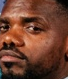

Result #1: gilmário vemba was diagnosed with 78.869414 confidence
This image score was 0.78869414


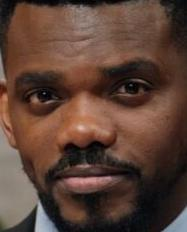

--------------------------------------------------

Result #2: gilmário vemba was diagnosed with 75.285995 confidence
This image score was 0.75285995


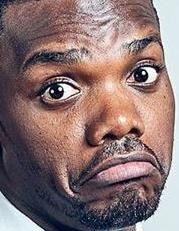

--------------------------------------------------

Result #3: gilmário vemba was diagnosed with 72.51355000000001 confidence
This image score was 0.7251355


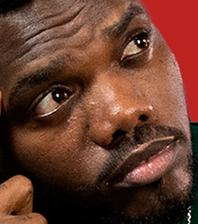

--------------------------------------------------

Face 2:


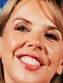

Result #1: cristina ferreira was diagnosed with 78.36007000000001 confidence
This image score was 0.7836007


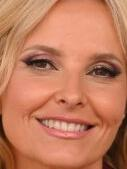

--------------------------------------------------

Result #2: cristina ferreira was diagnosed with 71.829206 confidence
This image score was 0.71829206


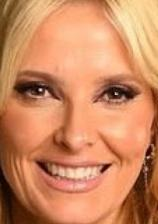

--------------------------------------------------

Result #3: diana chaves was diagnosed with 68.93866 confidence
This image score was 0.6893866


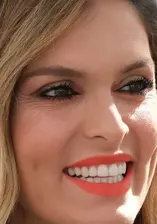

--------------------------------------------------

Face 3:


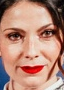

Result #1: madalena abecasis was diagnosed with 56.83820000000001 confidence
This image score was 0.568382


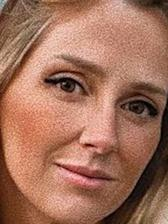

--------------------------------------------------

Result #2: cristina ferreira was diagnosed with 53.972363 confidence
This image score was 0.53972363


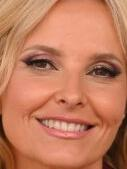

--------------------------------------------------

Result #3: gabriela barros was diagnosed with 53.268015000000005 confidence
This image score was 0.53268015


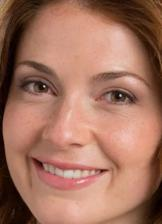

--------------------------------------------------

Face 4:


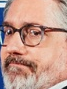

Result #1: nuno markl was diagnosed with 84.84372 confidence
This image score was 0.8484372


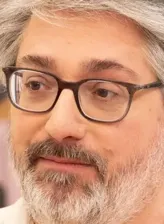

--------------------------------------------------

Result #2: nuno markl was diagnosed with 76.020676 confidence
This image score was 0.76020676


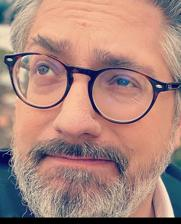

--------------------------------------------------

Result #3: nuno markl was diagnosed with 73.09428 confidence
This image score was 0.7309428


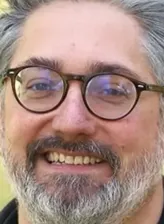

--------------------------------------------------

Face 5:


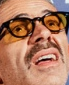

Result #1: nuno markl was diagnosed with 58.051413 confidence
This image score was 0.58051413


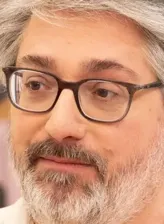

--------------------------------------------------

Result #2: nuno markl was diagnosed with 54.189503 confidence
This image score was 0.54189503


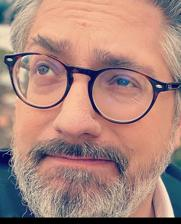

--------------------------------------------------

Result #3: joana marques was diagnosed with 50.876075 confidence
This image score was 0.50876075


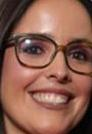

--------------------------------------------------

Face 6:


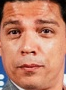

Result #1: vasco palmeirim was diagnosed with 51.665425 confidence
This image score was 0.51665425


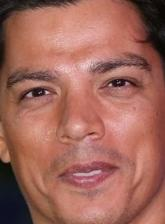

--------------------------------------------------

Result #2: luis montenegro was diagnosed with 48.237237 confidence
This image score was 0.48237237


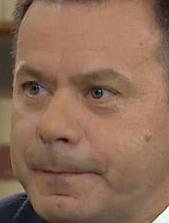

--------------------------------------------------

Result #3: luis montenegro was diagnosed with 47.704923 confidence
This image score was 0.47704923


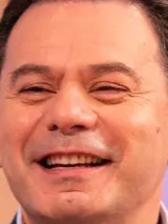

--------------------------------------------------



In [15]:
def print_results(results):
    msg = f"{len(results)} faces were found in the provided image" if len(results) > 1 else f"{len(results)} face was found in the provided image"
    print(msg)
    for j, result in enumerate(results):
        # print(f"{j}: {result.points}")
        points = result.points
        print(f"Face {j+1}:")
        searched_faces[j].show()
        for i in range(len(points)):
            name = points[i].payload['name']
            score = points[i].score
            print(f"Result #{i+1}: {name} was diagnosed with {score * 100} confidence")
            print(f"This image score was {score}")
            Image.open(f"faces/{points[i].payload['file_name']}").show()
            print("-" * 50)
            print()

print_results(nearest_results)

Com o objetivo de, no futuro, aumentar as funcionalidades da nossa aplicação, deixamos também disponíveis funções que nos permitem eliminar e consultar pontos da base de dados. 

In [16]:
res = qd.get_points_from_collection(client, collection, 5)
res

([Record(id='03f88305-32ec-439b-bc17-1b830d018cb8', payload={'name': 'josé mourinho', 'file_name': 'José_Mourinho_2.jpg'}, vector=None, shard_key=None, order_value=None),
  Record(id='054c5538-bd3e-4cd4-8e2a-1ccefe2b7dbe', payload={'name': 'joana marques', 'file_name': 'Joana_Marques_2.jpg'}, vector=None, shard_key=None, order_value=None),
  Record(id='141147ce-405a-4f12-b72c-534d7edd637d', payload={'name': 'pedro nuno santos', 'file_name': 'Pedro_Nuno_Santos_3.jpg'}, vector=None, shard_key=None, order_value=None),
  Record(id='15527c52-488f-4e88-9d56-1441eb537b6e', payload={'name': 'vasco palmeirim', 'file_name': 'Vasco_Palmeirim_2.jpg'}, vector=None, shard_key=None, order_value=None),
  Record(id='18602457-3ae2-4791-9ef8-23c63b36df29', payload={'name': 'josé mourinho', 'file_name': 'José_Mourinho_1.webp'}, vector=None, shard_key=None, order_value=None)],
 '19e3caf8-0d81-46ae-90bf-3f4792661de6')

In [17]:
id = res[0][0].id
qd.delete_points_from_collection(client, collection, [id])

Points deleted successfully


<br>

### &ensp; Aplicação *Facial Recognition System*

A última etapa do nosso projeto consistiu em implementar uma aplicação que permitisse, de uma forma simples e intuitiva, fazer uma procura por similaridade entre uma imagem de uma pessoa fornecida pelo utilizador e os dados armazenados na nossa base de dados.

Para o efeito, utilizamos a framework de desenvolvimento aplicacional [Streamlit](https://streamlit.io/).

In [ ]:
%%writefile search_image.py

from qdrant_client import QdrantClient
import os
import streamlit as st
import torch

import utils as qd
import models as mdl

torch.classes.__path__ = []  # Neutralizes the path inspection

# Local dev
client = QdrantClient(host="localhost", port=6333)

collection = "image_collection"

current_directory = os.getcwd()

# Initialize models
device, processor, model, detector = mdl.init_models()

st.title("Facial Recognition System")
st.markdown("Upload images with different faces and you'll get the most similar ones from our database.")

uploaded_file = st.file_uploader(label = "Upload some image",
                                 type=["jpg", "jpeg", "webp"])

# Search top X similar results
top = st.radio(
    "How many search results do you want?",
    [1, 3, 5],
)

with st.spinner("Waiting for results..."):
    if uploaded_file:
        img_to_search, searched_faces = mdl.gen_embedding_img_to_search(uploaded_file, processor, device, model, detector)


        nearest_results = []
        for img in img_to_search:
            nearest = qd.get_top_x_similar_images(client, collection, top, img)
            nearest_results.append(nearest)

        st.markdown("## Results:")

        def print_results(results):
            msg = f"{len(results)} faces were found in the provided image" if len(results) > 1 else f"{len(results)} face was found in the provided image"
            st.markdown(msg)

            for j, result in enumerate(results):
                points = result.points
                st.markdown(f"Face {j+1}:")
                st.image(searched_faces[j], width = 200)
                for i in range(len(points)):
                    name = points[i].payload['name']
                    score = points[i].score
                    st.markdown(f"Result #{i+1}: {name} was diagnosed with {score * 100} confidence")
                    st.markdown(f"This image score was {score}")
                    st.image(f"faces/{points[i].payload['file_name']}")
                    st.markdown("-" * 50)


        print_results(nearest_results)

In [18]:
!streamlit run search_image.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.31.66.20:8501

gio: http://localhost:8501: Operation not supported
2025-05-05 21:35:15.075912: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

<br>

---

<br>

## <center>Conclusão

Este projeto constituiu uma experiência de aprendizagem valiosa, proporcionando-nos a oportunidade de aprofundar conhecimentos em diversas áreas tecnológicas. Tivemos a possibilidade de trabalhar com bases de dados vetoriais, explorando a sua estrutura e potencial para armazenamento e pesquisa de dados complexos. A utilização de modelos de *Machine Learning* para a transformação de imagens em *embeddings* permitiu-nos compreender o poder da representação vetorial na análise visual. Adicionalmente, aplicamos técnicas de processamento de imagem para preparar os dados e desenvolvemos uma aplicação web, recorrendo a bibliotecas e frameworks especializados, consolidando assim as nossas competências de desenvolvimento.

Do nosso ponto de vista, o objetivo inicial de conceber um sistema de recolha e armazenamento de imagens num sistema de bases de dados vetorial, com a finalidade de identificar padrões visuais, foi efetivamente alcançado. O sistema implementado demonstra a capacidade de processar imagens, extrair características relevantes e armazená-las de forma que seja possível fazer pesquisas por imagens similares.

Contudo, reconhecemos que há muito a explorar no sentido de refinar e expandir este projeto. Para evoluir para um sistema mais robusto, abrangente e fiável, poderíamos seguir por vários caminhos de desenvolvimento. Uma direção promissora seria treinar os modelos de extração de características. Ajustar os modelos aos nossos dados e à tarefa particular de reconhecimento facial poderia otimizar significativamente a qualidade dos *embeddings* gerados e, consequentemente, a precisão do sistema. Outra melhoria crucial seria tornar a aplicação mais interativa e flexível, permitindo ao utilizador fornecer uma imagem representativa de um padrão específico a ser procurado na base de dados. Esta funcionalidade expandiria significativamente a usabilidade do sistema para cenários de pesquisa mais direcionados.